# Lab 01 - Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Simple Linear Regression

### 1.1. Example

In [3]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 1.3, 3.75, 2.25])
print("X:", X)
print("y:", y)

X: [[1]
 [2]
 [3]
 [4]
 [5]]
y: [1.   2.   1.3  3.75 2.25]


In [4]:
# Reshape y to match X shape for calculations
y = y.reshape(-1, 1)
print("Reshaped y:", y)

Reshaped y: [[1.  ]
 [2.  ]
 [1.3 ]
 [3.75]
 [2.25]]


In [5]:
# Calculate means
X_mean = np.mean(X)
y_mean = np.mean(y)

print("X - mean(X):", X - X_mean)
print("y - mean(y):", y - y_mean)

X - mean(X): [[-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]]
y - mean(y): [[-1.06]
 [-0.06]
 [-0.76]
 [ 1.69]
 [ 0.19]]


In [6]:
# Calculate variances and covariances
N = X.shape[0]
var_X = np.sum((X - X_mean)**2) / (N - 1)
print("Variance of X:", var_X)

cov_Xy = np.sum((X - X_mean) * (y - y_mean)) / (N - 1)
print("Covariance of X and y:", cov_Xy)

Variance of X: 2.5
Covariance of X and y: 1.0625


In [7]:
# Calculate intercept and coefficients
coefficients =  cov_Xy / var_X
intercept = y_mean - coefficients * X_mean

print(f"Calculated coefficients: {coefficients}, intercept: {intercept}")


Calculated coefficients: 0.425, intercept: 0.7850000000000001


In [8]:
# Make predictions
y_pred = intercept + coefficients * X
print("Predicted y:", y_pred)

Predicted y: [[1.21 ]
 [1.635]
 [2.06 ]
 [2.485]
 [2.91 ]]


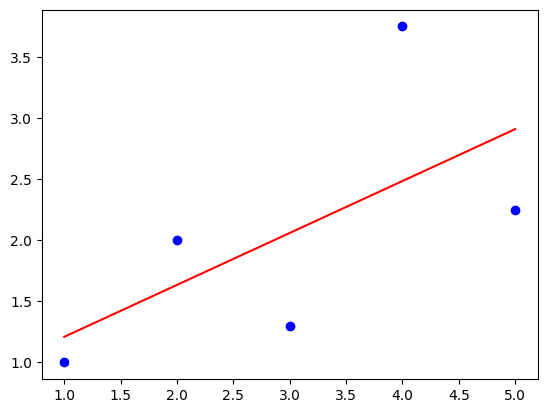

In [9]:
# Plot results
plt.scatter(X, y, color="blue")
plt.plot(X, y_pred, color="red")
plt.show()

### 1.2. Write a regression class

In [10]:
class SimpleLinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        X_mean = np.mean(X)
        y_mean = np.mean(y)

        N = X.shape[0]
        var_X = np.sum((X - X_mean)**2) / (N - 1)
        cov_Xy = np.sum((X - X_mean) * (y - y_mean)) / (N - 1)

        self.coefficients = cov_Xy / var_X
        self.intercept = y_mean - self.coefficients * X_mean

        print(f"Fitted coefficients: {self.coefficients}, intercept: {self.intercept}")

    def predict(self, X):
        return self.intercept + self.coefficients * X

In [11]:
# Function to randomly generate data
def generate_data(num_points=100):
    X = np.random.rand(num_points, 1) * 10 
    y = 2.5 * X + np.random.randn(num_points, 1) * 2
    return X, y

In [12]:
X, y = generate_data(20)
print("Generated X:", X)
print("Generated y:", y)

Generated X: [[8.43703428]
 [6.27340326]
 [0.02978598]
 [4.05799389]
 [6.94745099]
 [0.69221808]
 [6.72131372]
 [8.79971383]
 [4.22976363]
 [4.97644002]
 [3.58870366]
 [8.78366314]
 [0.79512433]
 [8.30933473]
 [3.22208788]
 [5.4391473 ]
 [6.50817371]
 [3.67355095]
 [1.84489638]
 [5.68488704]]
Generated y: [[21.37646949]
 [15.1229325 ]
 [-0.14750046]
 [ 9.12709369]
 [20.01301725]
 [ 1.06648374]
 [20.29329868]
 [19.89102132]
 [12.87512991]
 [12.49452383]
 [ 9.99330922]
 [21.02336052]
 [ 2.4426202 ]
 [21.05575587]
 [10.55446863]
 [16.03775988]
 [16.45139204]
 [ 5.45147836]
 [ 5.93140869]
 [16.05840126]]


Fitted coefficients: 2.500163727757315, intercept: 0.4779748082724975


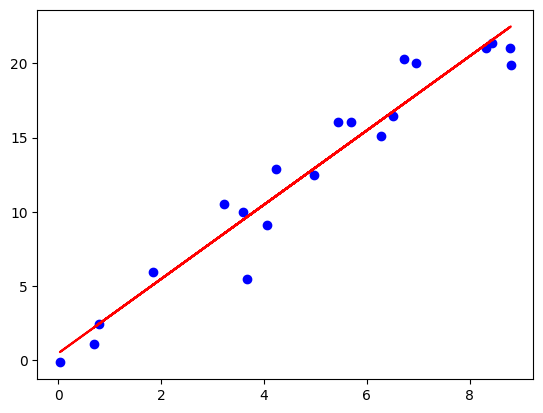

In [13]:
reg = SimpleLinearRegression()
reg.fit(X, y)
y_hat = reg.predict(X)

plt.scatter(X, y, color="blue")
plt.plot(X, y_hat, color="red")
plt.show()

## Multiple Linear Regression

In [25]:
X = np.array(
    [
        [1,1,1],
        [1,1,2],
        [1,2,2],
        [1,0,1]
    ]
)

Y = np.array([
    3.25,
    6.5,
    3.5,
    5.0
])

In [26]:
XT_dot_X = np.linalg.inv(np.dot(X.T, X))
X_dot_Y = np.dot(X.T, Y)

B = np.dot(XT_dot_X, X_dot_Y)
print("Calculated coefficients B:", B)

Calculated coefficients B: [ 2.0625 -2.375   3.25  ]


In [27]:
class MultipleLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, Y):
        XT_dot_X = np.linalg.inv(np.dot(X.T, X))
        X_dot_Y = np.dot(X.T, Y)
        self.coefficients = np.dot(XT_dot_X, X_dot_Y)
        print("Fitted coefficients B:", self.coefficients)

    def predict(self, X):
        return np.dot(X, self.coefficients)

In [31]:
reg = MultipleLinearRegression()
reg.fit(X, Y)
Y_hat = reg.predict(X)
print("Predicted Y:", Y_hat)
print("Actual Y:", Y)

Fitted coefficients B: [ 2.0625 -2.375   3.25  ]
Predicted Y: [2.9375 6.1875 3.8125 5.3125]
Actual Y: [3.25 6.5  3.5  5.  ]


## Gradient Descent

In [ ]:
def gradient_descent(starting_point, gradient_func, learning_rate=0.01, max_iter=100, tolerance=1e-6):
    steps = [starting_point]
    x = starting_point

    for _ in range(max_iter):
        grad = gradient_func(x)
        diff = learning_rate * grad
        if np.abs(diff) < tolerance:
            break
        else:
            x = x - diff
            steps.append(x)
    return steps, x